<a href="https://colab.research.google.com/github/irynagorbenko/data-science/blob/opi-radiomics/logistic_regression_real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Read data from Google Drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
from google.auth import default
creds, _ = default()
import mlxtend
gc = gspread.authorize(creds)
from google.colab import files

# Open our new sheet and add some data.
spreadsheet_t2w = gc.open_by_url('https://docs.google.com/spreadsheets/d/1KdWPJXd2hyHcgdjeLFLjk9LSjkt-FXdj6-rJyKTmz40/edit#gid=1571581113')
rad_t2w= spreadsheet_t2w.worksheet('radiomics_t2w');

spreadsheet_sr = gc.open_by_url('https://docs.google.com/spreadsheets/d/14jIp0aDgYX80AZa_HuQi10RNzzkvq7SJUkM19R-DMuM/edit#gid=0')
sr= spreadsheet_sr.worksheet('final_sr_DF');

# get_all_values gives a list of rows.
# rows = rad_t2w.get('A1:AU1028')

In [ ]:
sr

In [30]:
import pandas as pd
df_t2w = pd.DataFrame(rad_t2w.get_all_records())
radDF = df_t2w.loc[:446, :]
radDF.shape

(447, 47)

In [31]:
srDF = pd.DataFrame(sr.get_all_records())
srDF.shape

(447, 69)

In [ ]:
radDF.info()

In [ ]:
srDF.info()

In [ ]:
radDF[['original_firstorder_Energy']]

In [ ]:
srDF[['patient_pirads']]

In [32]:
x = radDF[['original_firstorder_Energy']]
y = srDF[['patient_pirads']]
idx = y[y['patient_pirads'] == ''].index # empty pi-rads in line 183
idx

Int64Index([183], dtype='int64')

In [33]:
x = x.drop(idx)
y = y.drop(idx)

In [34]:
y.shape

(446, 1)

# **Distribution check**




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
# plt.hist(x, color = 'blue', edgecolor = 'black', bins = 50)#, bins = int(180/5))

# seaborn histogram
sns.distplot(x, hist=True, kde=False, bins = 80, color = 'blue', hist_kws={'edgecolor':'black'}) #bins=int(180/5), 

# Add labels
plt.title('Histogram of original_firstorder_Energy')
plt.xlabel('Energy')
plt.ylabel('Count')

In [ ]:
srDF[['patient_id', 'radiologist_id', 'patient_pirads']]

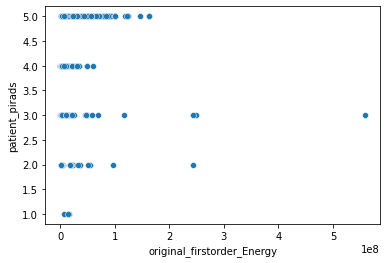

In [27]:
import seaborn as sns

temprad = radDF[['patient_id', 'radiologist_id', 'original_firstorder_Energy']]
tempsr = srDF[['patient_id', 'radiologist_id', 'patient_pirads']]
idx = tempsr[tempsr['patient_pirads'] == ''].index
temprad = temprad.drop(idx)
tempsr = tempsr.drop(idx)

tempDF = pd.merge(temprad, tempsr, on=["patient_id", "radiologist_id"])

sns.scatterplot(data=tempDF, x="original_firstorder_Energy", y="patient_pirads")#, hue="time")

In [20]:
# Check how many studies of pi-rads in range 1 to 5 are in data

pirads1 = tempDF['patient_pirads'].value_counts()[1]
pirads2 = tempDF['patient_pirads'].value_counts()[2]
pirads3 = tempDF['patient_pirads'].value_counts()[3]
pirads4 = tempDF['patient_pirads'].value_counts()[4]
pirads5 = tempDF['patient_pirads'].value_counts()[5]
print(pirads1, pirads2, pirads3, pirads4, pirads5)

3 22 52 238 277


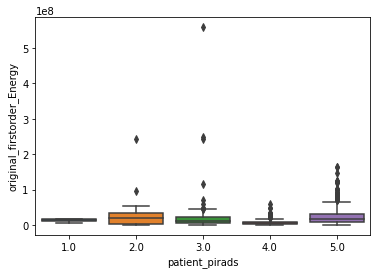

In [25]:
sns.boxplot(data=tempDF, x="patient_pirads", y="original_firstorder_Energy")

In [15]:
tempDF

,patient_id,radiologist_id,original_firstorder_Energy,patient_pirads
0,1,U_OjmNZ8,3410783.0,5.0
1,1,U_8ZmM76,18951780.0,5.0
2,1,U_OrjnrO,28481031.0,5.0
3,3,U_8ZmM76,2243638.0,5.0
4,3,U_8ZmM76,2243638.0,5.0
...,...,...,...,...
587,525,U_OjmNZ8,3786170.0,4.0
588,525,U_8ZmM76,7963303.0,4.0
589,527,U_8ekGLQ,43818916.0,5.0
590,527,U_OjmNZ8,31290490.0,4.0


In [ ]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause
#!pip install -U scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ("multinomial", "ovr"):
    clf = LogisticRegression(
        solver="sag", max_iter=100, random_state=42, multi_class=multi_class
    ).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf, X, response_method="predict", cmap=plt.cm.Paired, ax=ax
    )
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired, edgecolor="black", s=20
        )

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()


#**scikit-learn**










In [35]:
# Import libraries for analysis in scikit-learn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
# 1. Example data

# The input and output should be NumPy arrays
#x = np.arange(10).reshape(-1, 1) # The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. 
#y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) # y is one-dimensional with ten items. Each item corresponds to one observation. It contains only zeros and ones since this is a binary classification problem.

x = x.to_numpy()
#y = y.to_numpy()

y = y.to_numpy().ravel()

In [37]:
y = y.astype(str).astype(float).astype(int)

In [38]:
# 2. Model

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x, y) # it fits the model and returns the model instance
# Important parameters

# penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.
# C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.
# class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.
# solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.
# max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.
# multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.
# warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.
# n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.
# l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

# Warning
# 'liblinear' solver doesn’t work without regularization.
#'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.
#'saga' is the only solver that supports elastic-net regularization.

LogisticRegression(random_state=0, solver='liblinear')

In [39]:
# the example of binary classification, and y can be 0 or 1
model.classes_ 

array([1, 2, 3, 4, 5])

In [40]:
# the intercept 𝑏₀ of the linear function 𝑓
model.intercept_

array([-6.84567986e-13, -4.02189456e-14, -1.22946751e-14,  2.03851081e-15,
       -3.24013218e-16])

In [41]:
# the value of the slope 𝑏₁ of the linear function 𝑓
model.coef_

array([[-7.18096115e-07],
       [-1.14131729e-07],
       [-3.86031602e-08],
       [-5.21054119e-08],
       [ 6.97174686e-09]])

In [42]:
# 3. Evaluate the Model

model.predict_proba(x) # returns the matrix of probabilities that the predicted output is equal to zero or one

# Each row corresponds to a single observation. 
# The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). 
# The second column is the probability that the output is one, or 𝑝(𝑥).

array([[4.15721410e-02, 2.11224073e-01, 2.44296747e-01, 2.38311734e-01,
        2.64595304e-01],
       [9.97382289e-07, 8.36790585e-02, 2.63595111e-01, 2.20234440e-01,
        4.32490393e-01],
       [1.28393280e-09, 3.65224203e-02, 2.44595655e-01, 1.80940972e-01,
        5.37940952e-01],
       ...,
       [2.60034806e-14, 8.04914740e-03, 1.87308659e-01, 1.11398307e-01,
        6.93243886e-01],
       [1.78792641e-10, 2.80382472e-02, 2.35844273e-01, 1.67884910e-01,
        5.68232570e-01],
       [3.01373598e-18, 2.08799015e-03, 1.34914447e-01, 6.64348714e-02,
        7.96562691e-01]])

In [43]:
# The actual predictions, based on the probability matrix and the values of 𝑝(𝑥)
model.predict(x)

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [44]:
# Returns the ratio of the number of correct predictions to the number of observations
model.score(x, y)

0.48654708520179374

In [45]:
# Confusion matrix

#In the case of binary classification, the confusion matrix shows the numbers of the following:
# True negatives in the upper-left position
# False negatives in the lower-left position
# False positives in the upper-right position
# True positives in the lower-right position

confusion_matrix(y, model.predict(x))
# Three true negative predictions: The first three observations are zeros predicted correctly.
# No false negative predictions: These are the ones wrongly predicted as zeros.
# One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
# Six true positive predictions: The last six observations are ones predicted correctly.

array([[  0,   0,   0,   0,   3],
       [  0,   0,   0,   0,  18],
       [  0,   0,   0,   0,  40],
       [  0,   0,   0,   0, 168],
       [  0,   0,   0,   0, 217]])

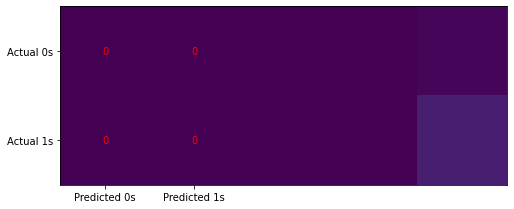

In [46]:
# Visualization of the confusion matrix

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [170]:
# Classification report

print(classification_report(y, model.predict(x)))

#  It returns a report on the classification as a dictionary if you provide output_dict=True or a string otherwise.

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        18
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00       168
           5       0.49      1.00      0.65       217

    accuracy                           0.49       446
   macro avg       0.10      0.20      0.13       446
weighted avg       0.24      0.49      0.32       446



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# 4. Improve the Model

# regularization strength C equal to 10.0, instead of the default value of 1.0
# the larger value of C means weaker regularization, or weaker penalization related to high values of 𝑏₀ and 𝑏₁.
model = LogisticRegression(solver='saga')#, class_weight='balanced') # C=10.0,
model.fit(x, y)
model.score(x, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.48654708520179374

In [ ]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [ ]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# **StatsModels**



In [ ]:
# Import libraries
import numpy as np
import statsmodels.api as sm

In [ ]:
# 1. DATA

# StatsModels doesn’t take the intercept 𝑏₀ into account, and you need to include the additional column of ones in x.
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])
x = sm.add_constant(x) # add_constant() takes the array x as the argument and returns a new array with the additional column of ones. 
# The first column of x corresponds to the intercept 𝑏₀. The second column contains the original values of x.

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.],
       [1., 8.],
       [1., 9.]])

In [ ]:
# 2. MODEL

# Create a Model and Train It
model = sm.Logit(y, x) # Note that the first argument here is y, followed by x.
result = model.fit(method='newton')

Optimization terminated successfully.
         Current function value: 0.350471
         Iterations 7


In [ ]:
# obtain the values of 𝑏₀ and 𝑏₁. The first element is the intercept 𝑏₀, the second is the slope 𝑏₁.
result.params

array([-1.972805  ,  0.82240094])

In [ ]:
# 3. Evaluate the Model

result.predict(x)

array([0.12208792, 0.24041529, 0.41872657, 0.62114189, 0.78864861,
       0.89465521, 0.95080891, 0.97777369, 0.99011108, 0.99563083])

In [ ]:
# Actual predicted outputs
(result.predict(x) >= 0.5).astype(int)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# Confusion matrix
result.pred_table()

array([[2., 1.],
       [1., 6.]])

In [ ]:
# Summary

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   10
Model:                          Logit   Df Residuals:                        8
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.4263
Time:                        12:35:47   Log-Likelihood:                -3.5047
converged:                       True   LL-Null:                       -6.1086
Covariance Type:            nonrobust   LLR p-value:                   0.02248
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9728      1.737     -1.136      0.256      -5.377       1.431
x1             0.8224      0.528      1.557      0.119      -0.213       1.858
==============================================================================
"""

In [ ]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.426   
Dependent Variable: y                AIC:              11.0094 
Date:               2023-02-07 12:36 BIC:              11.6146 
No. Observations:   10               Log-Likelihood:   -3.5047 
Df Model:           1                LL-Null:          -6.1086 
Df Residuals:       8                LLR p-value:      0.022485
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.9728     1.7366   -1.1360   0.2560   -5.3765   1.4309
x1        0.8224     0.5281    1.5572   0.1194   -0.2127   1.8575
===============================================================

"""